# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.003
-0.004
-0.004
-0.003
-0.001
-0.002
-0.003
-0.003
0.984
0.986
0.988
0.988
0.987
1.976
1.978
1.979
1.979
1.979
2.973
2.972
2.971
2.973
3.958
3.962
3.963
3.963
3.964
4.955
4.955
4.953
4.954
5.945
5.948
5.95
5.949
5.949
6.635
6.635
6.635
6.635
7.317
7.319
7.321
7.32
7.32
8.311
8.314
8.316
8.316
8.316
9.307
9.31
9.312
9.311
9.312
10.302
10.305
10.306
10.306
10.305
11.303
11.302
11.3
11.302
12.29
12.294
12.295
12.295
12.294
13.285
13.287
13.289
13.287
13.288
14.07
14.072
14.074
14.074
14.075
14.856
14.859
14.86
14.859
14.859
15.848
15.848
15.848
15.848
16.842
16.842
16.841
16.842
17.834
17.834
17.834
17.834
18.825
18.825
18.825
18.825
19.821
19.821
19.82
19.821
20.813
20.813
20.812
20.812
21.547
21.547
21.547
21.546
22.283
22.283
22.282
22.282
23.272
23.272
23.271
23.271
24.261
24.261
24.26
24.26
25.255
25.254
25.253
25.253
26.249
26.248
26.247
26.247
27.24
27.24
27.239
27.24
28.244
28.244
28.244
28

57.274
57.497
57.497
57.498
57.498
57.497
57.497
57.496
57.514
57.515
57.514
57.514
57.514
57.514
57.529
57.529
57.53
57.531
57.531
57.53
57.53
57.53
57.529
57.528
57.528
57.528
57.528
57.528
57.528
57.528
57.527
57.527
57.527
57.527
57.52
57.528
57.527
57.529
57.529
57.528
57.52
57.526
57.526
57.526
57.526
57.526
57.527
57.527
57.527
57.525
57.524
57.524
57.525
57.525
57.792
57.792
57.792
57.792
57.792
57.791
57.791
57.791
57.789
57.816
57.816
57.816
57.816
57.816
57.816
57.816
57.818
57.818
57.818
57.818
57.817
57.817
57.816
57.816
57.816
57.816
57.816
57.816
57.815
57.815
57.815
57.815
57.815
57.814
57.814
57.814
57.814
57.814
57.814
57.812
57.812
57.812
57.812
57.812
57.813
57.813
57.813
57.813
57.812
57.811
57.811
57.811
57.811
58.055
58.055
58.055
58.055
58.054
58.054
58.054
58.066
58.066
58.066
58.066
58.065
58.065
58.065
58.065
58.065
58.065
58.065
58.065
58.064
58.064
58.064
58.064
58.063
58.063
58.063
58.063
58.063
58.063
58.063
58.063
58.063
58.063
58.063
58.062
58.062
58.06

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1447,2894,60.033
1448,2896,60.032
1449,2898,60.032
1450,2900,60.032


<IPython.core.display.Javascript object>


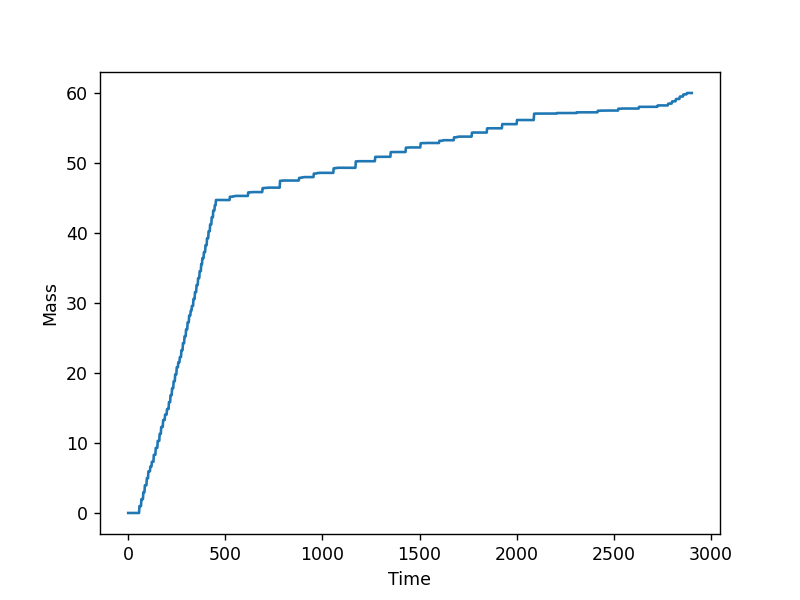

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_070823_S733-738.csv')